In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

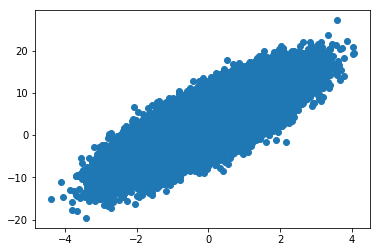

In [3]:
plt.scatter(x, y)
plt.show()

In [5]:
def J(theta, X_b, y):
    try:
        return np.sum((X_b.dot(theta) - y) ** 2)/len(y)
    except:
        return float("inf")
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta
        

In [6]:
%%time
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 1.31 s


In [7]:
theta

array([2.99214905, 3.99947221])

# 随机化梯度下降（Stochastic）

In [9]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.

def sgd(X_b, y, initial_theta, n_iters):
    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    theta = initial_theta
    for i_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(i_iter) * gradient
        
    return theta

In [11]:
%%time
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)

Wall time: 307 ms


In [12]:
theta

array([2.99556353, 3.97895359])